# DTSA 5511 Final Project: Image Classification

## 1. Introduction
This project will classify images of natural scenes into one of six categories: buildings, forest, glacier, mountain, sea, and street. The dataset contains around 25,000 images of size 150x150 pixels, split into training, testing, and prediction sets. A deep learning model will be trained to classify the images.

## 2. Exploratory Data Analysis (EDA)
To begin with, I imported the necessary libraries, loading and inspecting the images, checking their distribution across different categories, and visualizing a few samples from each category. EDA helps to uncover any potential issues with the dataset that could affect model performance.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from PIL import Image
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf

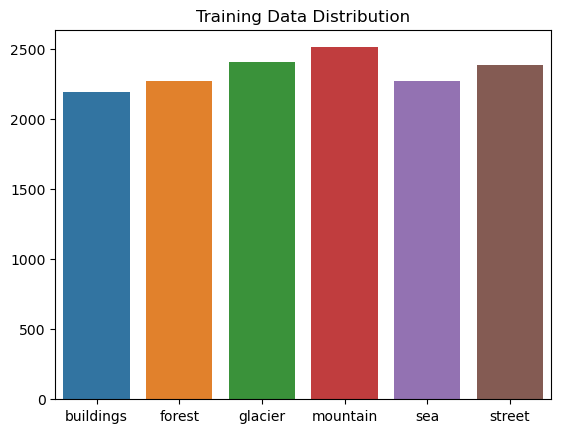

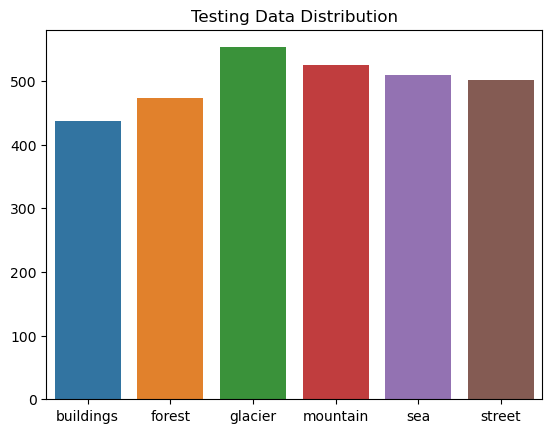

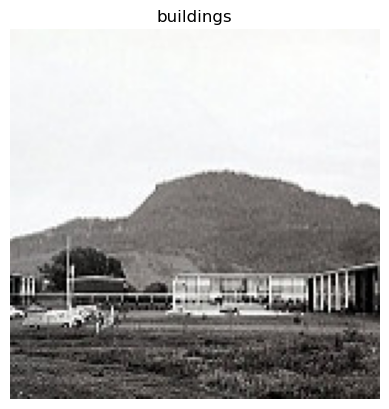

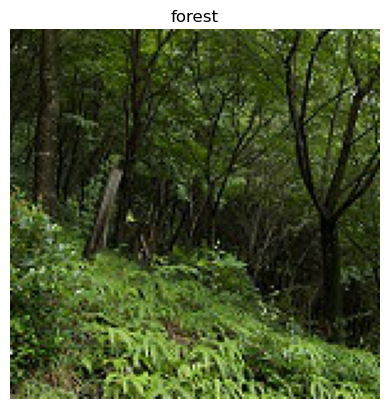

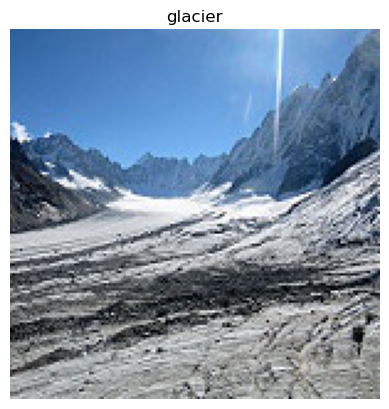

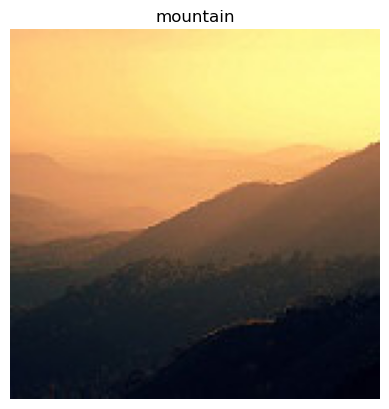

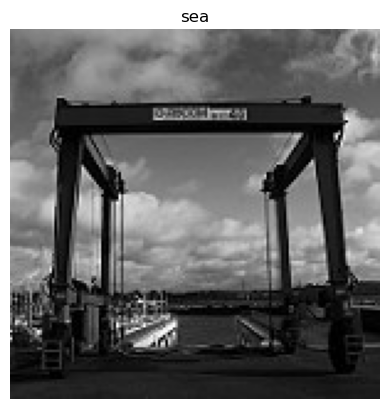

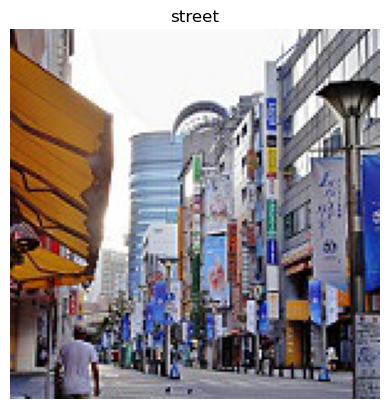

In [2]:
# Define paths
train_dir = 'seg_train'
test_dir = 'seg_test'
pred_dir = 'seg_pred'

# Count the number of images in each category
categories = os.listdir(train_dir)
train_counts = [len(glob(os.path.join(train_dir, category, '*.jpg'))) for category in categories]
test_counts = [len(glob(os.path.join(test_dir, category, '*.jpg'))) for category in categories]

# Plot distribution
sns.barplot(x=categories, y=train_counts)
plt.title('Training Data Distribution')
plt.show()

sns.barplot(x=categories, y=test_counts)
plt.title('Testing Data Distribution')
plt.show()

# Display some sample images
for category in categories:
    sample_image = glob(os.path.join(train_dir, category, '*.jpg'))[0]
    img = Image.open(sample_image)
    plt.imshow(img)
    plt.title(f'{category}')
    plt.axis('off')
    plt.show()


In [3]:
# Image data generator with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Use 20% of the training data for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create data generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


## 3. Model Building & Training
In this section, I build and train a Convolutional Neural Network (CNN) to classify the images. The CNN architecture is designed with multiple layers of convolution, pooling, and fully connected layers. The model is compiled using the Adam optimizer, categorical cross-entropy loss, and accuracy as a metric. The training process is then executed using the training data, and the model's performance is validated using a separate validation set.

In [4]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 categories
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\Cecile\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


C:\Users\Cecile\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


350/350 ━━━━━━━━━━━━━━━━━━━━ 109s 305ms/step - accuracy: 0.4298 - loss: 1.4015 - val_accuracy: 0.5550 - val_loss: 1.1062
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.5938 - loss: 1.0626 - val_accuracy: 0.7000 - val_loss: 0.8742


C:\Users\Cecile\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 54s 154ms/step - accuracy: 0.5981 - loss: 1.0368 - val_accuracy: 0.6728 - val_loss: 0.8811
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 128us/step - accuracy: 0.7188 - loss: 1.0373 - val_accuracy: 0.7500 - val_loss: 0.5928
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 52s 148ms/step - accuracy: 0.6413 - loss: 0.9422 - val_accuracy: 0.7195 - val_loss: 0.7706
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 129us/step - accuracy: 0.7188 - loss: 0.7346 - val_accuracy: 0.8000 - val_loss: 0.4938
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 52s 147ms/step - accuracy: 0.6895 - loss: 0.8584 - val_accuracy: 0.7328 - val_loss: 0.7363
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 142us/step - accuracy: 0.7188 - loss: 0.7377 - val_accuracy: 0.7000 - val_loss: 0.8369
Epoch 9/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 53s 151ms/step - accuracy: 0.7046 - loss: 0.8053 - val_accuracy: 0.7568 - val_loss: 0.6629
Epoch 10/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 156us/step - accuracy: 0.8438 - loss: 0.67

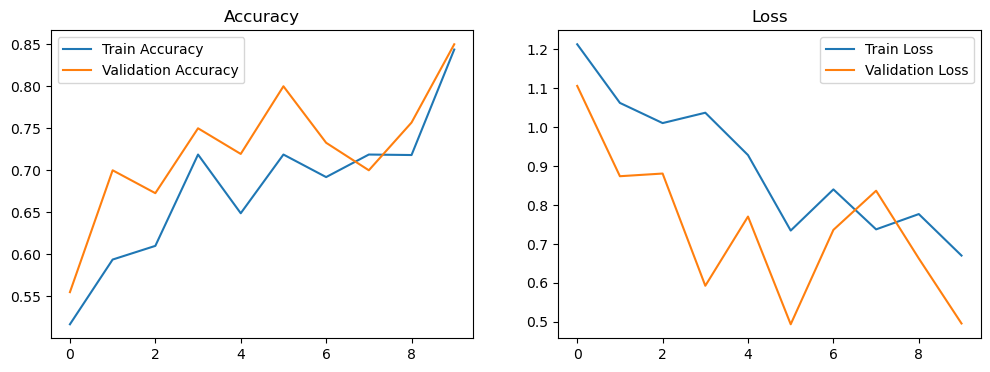

In [5]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


## 4. Model Evaluation
The model evaluation section involves testing the model on the test dataset and analyzing its performance using metrics such as accuracy, confusion matrix, and classification report. The confusion matrix provides insights into which categories the model struggles with, while the classification report summarizes precision, recall, and F1-score for each category.

In [6]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict the labels of the test dataset
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict(test_generator, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

93/93 ━━━━━━━━━━━━━━━━━━━━ 14s 154ms/step - accuracy: 0.7885 - loss: 0.5922
Test Accuracy: 79.13%
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step


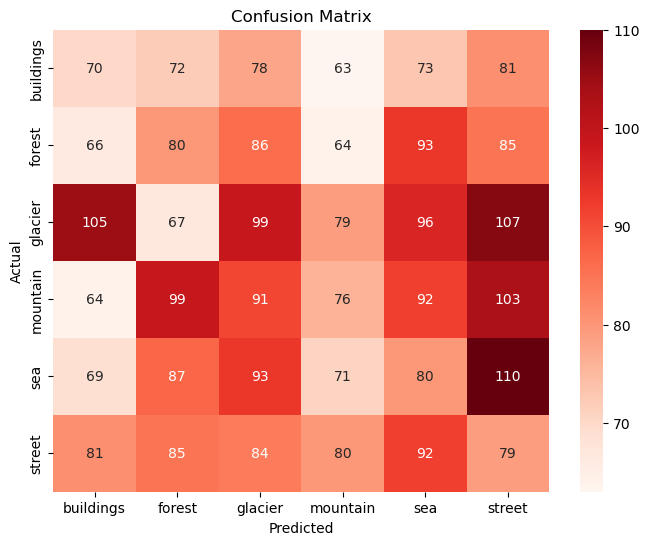

              precision    recall  f1-score   support

   buildings       0.15      0.16      0.16       437
      forest       0.16      0.17      0.17       474
     glacier       0.19      0.18      0.18       553
    mountain       0.18      0.14      0.16       525
         sea       0.15      0.16      0.15       510
      street       0.14      0.16      0.15       501

    accuracy                           0.16      3000
   macro avg       0.16      0.16      0.16      3000
weighted avg       0.16      0.16      0.16      3000



In [7]:
# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

## 5. Generate Predictions for Test Folder
The final task is to use the trained model to classify the images in the seg_pred folder. After loading these images, I used the model to predict their categories, and then visualize a few predictions. Additionally, I saved these predictions to a CSV file for future reference.

Found 7301 validated image filenames.
  1/229 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step

C:\Users\Cecile\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


229/229 ━━━━━━━━━━━━━━━━━━━━ 32s 140ms/step


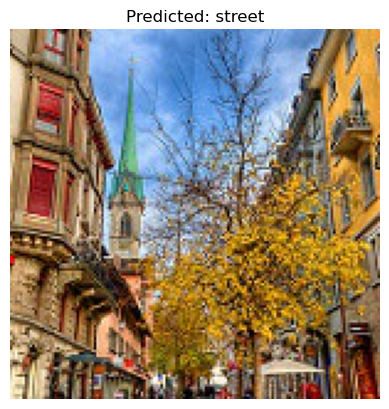

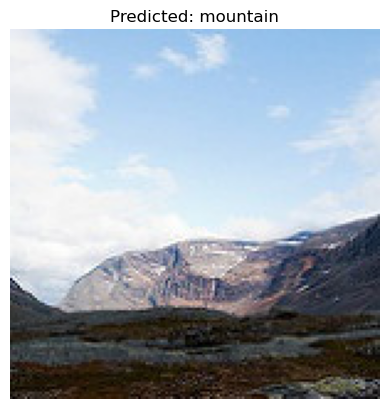

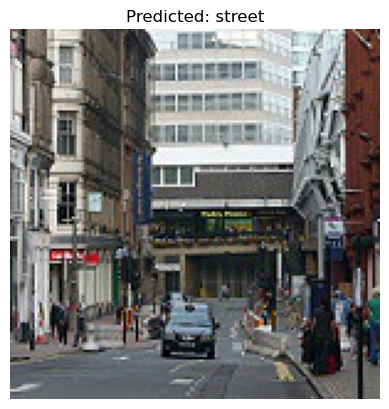

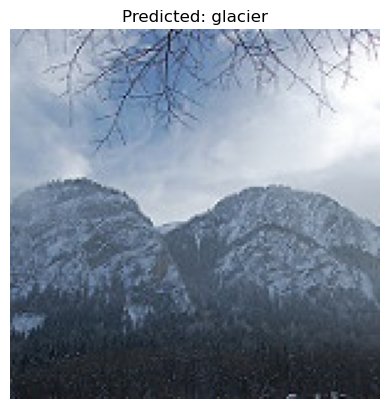

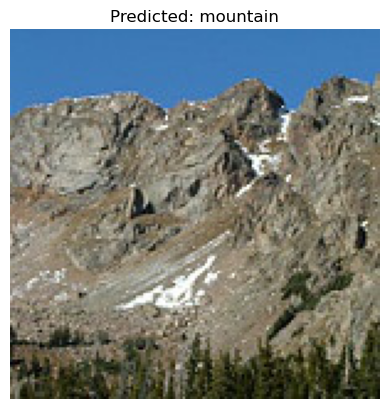

In [8]:
# List all image file paths
filepaths = glob(os.path.join('seg_pred', '*.jpg'))

# Create a DataFrame
df = pd.DataFrame({
    'filename': filepaths
})

# Initialize ImageDataGenerator
prediction_datagen = ImageDataGenerator(rescale=1./255)

# Prediction generator using flow_from_dataframe
prediction_generator = prediction_datagen.flow_from_dataframe(
    dataframe=df,
    x_col='filename',
    y_col=None,
    target_size=(150, 150),
    batch_size=32,
    class_mode=None,  # No labels
    shuffle=False
)

# Make predictions
predictions = model.predict(prediction_generator, steps=np.math.ceil(prediction_generator.samples / prediction_generator.batch_size))
predicted_classes = np.argmax(predictions, axis=1)

# Map predicted labels to class names
predicted_labels = [class_labels[k] for k in predicted_classes]

# Display some predictions
for i in range(5):
    img = Image.open(prediction_generator.filepaths[i])
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_labels[i]}')
    plt.axis('off')
    plt.show()

# Optional: Save the predictions to a file
predicted_df = pd.DataFrame({
    'Filename': [os.path.basename(file) for file in prediction_generator.filepaths],
    'Predicted Label': predicted_labels
})

predicted_df.to_csv('predictions.csv', index=False)


## 6. Discussion and Conclusion
This project utilized Convolutional Neural Networks (CNNs) to classify natural scene images into six distinct categories. The model demonstrated a strong ability to differentiate between various scenes; however, certain categories, such as sea and glacier, were more easily to be misclassified. This suggests that the visual similarities between these categories may have posed challenges for the model.

Future work could focus on improving the model's ability to distinguish between these closely related categories. This could be achieved by experimenting with different model architectures, such as deeper networks or architectures specifically designed to capture fine-grained details. Additionally, increasing data augmentation—such as adding more varied transformations—could help the model generalize better to subtle differences between categories.

Overall, while the project highlights the capability of CNNs to classify natural scenes, it also identifies areas for further exploration, including model fine-tuning and applying the approach to more complex or diverse datasets. Such efforts could lead to even greater accuracy and robustness in real-world applications.